In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('ps_game.csv')

In [9]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [13]:
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [21]:
df.columns

Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')

In [25]:
df.isnull().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [29]:
# Data Cleaning and Preparation
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')  # Convert release_date to datetime
df['year'] = df['release_date'].dt.year  # Extract year for analysis

In [33]:
# Filter data for meaningful visualizations (e.g., non-null sales and scores)
cleaned_data = df.dropna(subset=['total_sales', 'critic_score'])

C:\Users\pp912\AppData\Local\Temp\ipykernel_28776\899775769.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='title', data=top_sales, palette='Blues_r')


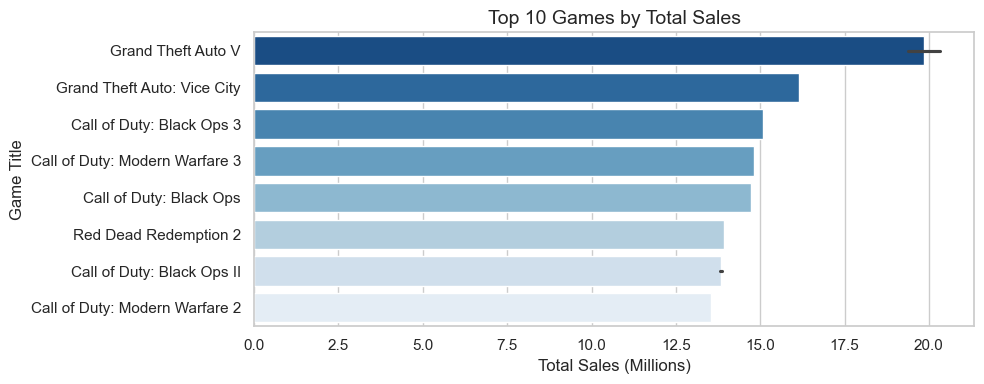

In [37]:
# Set the visualization style
sns.set(style="whitegrid")

# 1. Top 10 Games by Total Sales
top_sales = cleaned_data.nlargest(10, 'total_sales')
plt.figure(figsize=(10, 4))
sns.barplot(x='total_sales', y='title', data=top_sales, palette='Blues_r')
plt.title('Top 10 Games by Total Sales', fontsize=14)
plt.xlabel('Total Sales (Millions)', fontsize=12)
plt.ylabel('Game Title', fontsize=12)
plt.tight_layout()
plt.show()

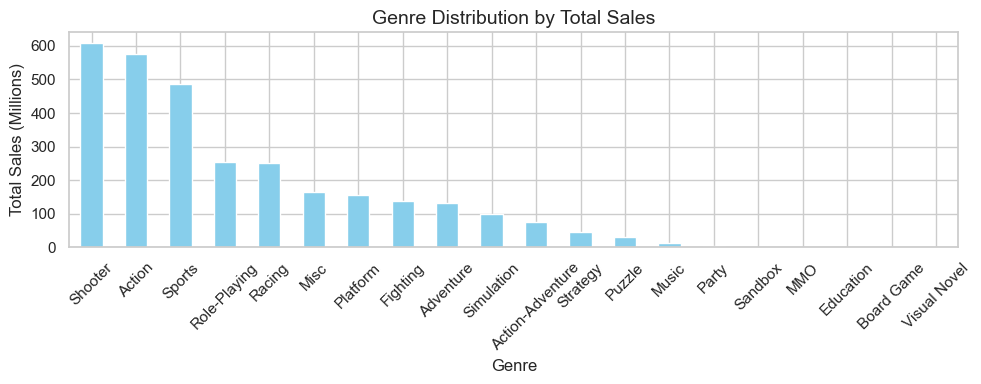

In [41]:
# 2. Genre Distribution by Total Sales
genre_sales = cleaned_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 4))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution by Total Sales', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Sales (Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

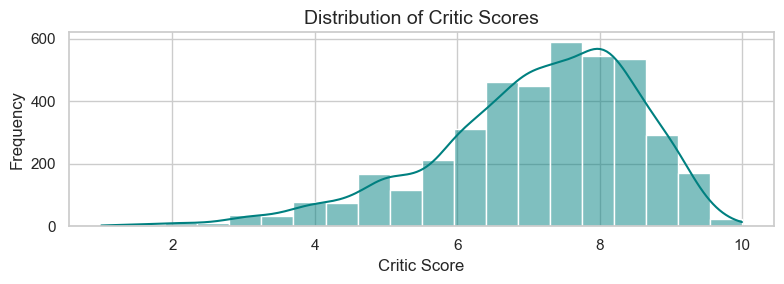

In [45]:

# 3. Critic Scores Distribution
plt.figure(figsize=(8, 3))
sns.histplot(cleaned_data['critic_score'], kde=True, bins=20, color='teal')
plt.title('Distribution of Critic Scores', fontsize=14)
plt.xlabel('Critic Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

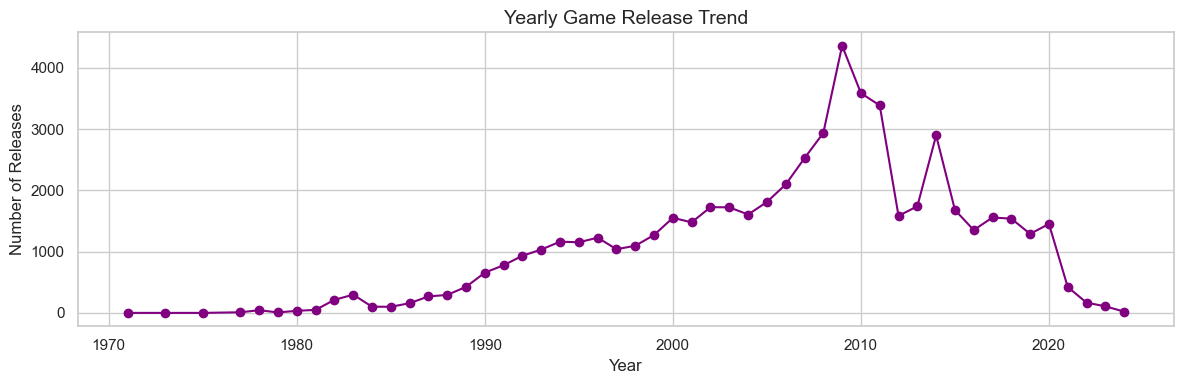

In [51]:
# 4. Yearly Release Trend
yearly_releases = df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 4))
yearly_releases.plot(kind='line', marker='o', color='purple')
plt.title('Yearly Game Release Trend', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Releases', fontsize=12)
plt.tight_layout()
plt.show()

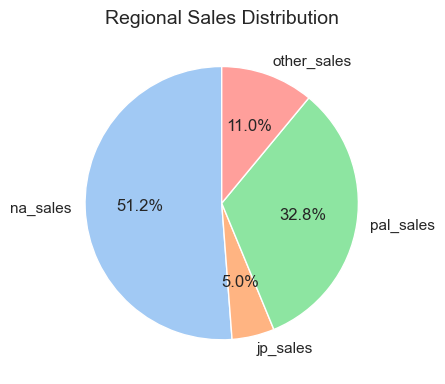

In [53]:
# 5. Regional Sales Comparison
regions = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']
region_totals = cleaned_data[regions].sum()
plt.figure(figsize=(10, 4))
region_totals.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Regional Sales Distribution', fontsize=14)
plt.ylabel('')  # Hide y-label for pie chart
plt.tight_layout()
plt.show()

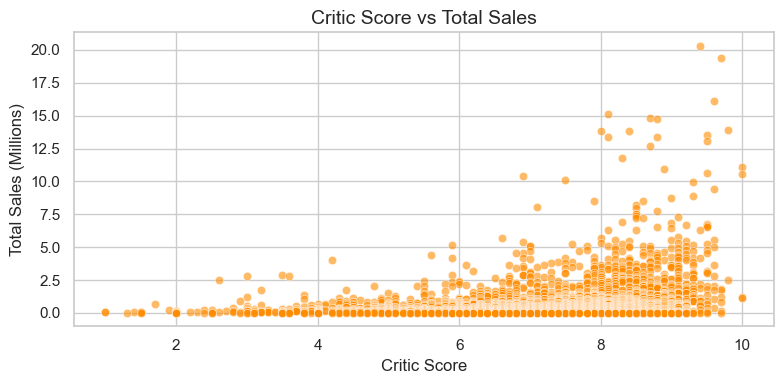

In [55]:
# 6. Critic Score vs Total Sales Correlation
plt.figure(figsize=(8, 4))
sns.scatterplot(x='critic_score', y='total_sales', data=cleaned_data, alpha=0.6, color='darkorange')
plt.title('Critic Score vs Total Sales', fontsize=14)
plt.xlabel('Critic Score', fontsize=12)
plt.ylabel('Total Sales (Millions)', fontsize=12)
plt.tight_layout()
plt.show()

                                                       Conclusion:
1. Top-Selling Games: A small group of games (e.g., Grand Theft Auto V) generate the highest sales, reflecting their global popularity and strong market presence.
2. Dominant Genres: Action and Shooter genres lead in total sales, demonstrating their broad appeal across diverse gaming audiences.
3. Impact of Critic Scores: While higher critic scores generally correlate with increased sales, they are not the sole driver, highlighting the importance of marketing and franchise strength.
4. Regional Preferences: North America is the largest contributor to game sales, followed by Europe (PAL region), while Japan shows specific genre preferences like RPGs.
5. Release Trends: The industry experiences release peaks in specific years, aligning with the launch of new consoles and technology advancements.